# 9장 향후 판매량 예측

https://www.kaggle.com/c/competitive-data-science-predict-future-sales/data

In [1]:
import pandas as pd

data_path = '../data/'

sales_train = pd.read_csv(data_path + 'sales_train.csv')
shops = pd.read_csv(data_path+'shops.csv')
items = pd.read_csv(data_path+'items.csv')
item_categories = pd.read_csv(data_path+'item_categories.csv')
test = pd.read_csv(data_path + 'test.csv')
submission = pd.read_csv(data_path + 'sample_submission.csv')

In [2]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [3]:
sales_train.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   date            2935849 non-null  object 
 1   date_block_num  2935849 non-null  int64  
 2   shop_id         2935849 non-null  int64  
 3   item_id         2935849 non-null  int64  
 4   item_price      2935849 non-null  float64
 5   item_cnt_day    2935849 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [6]:
shops.head(), shops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


(                        shop_name  shop_id
 0   !Якутск Орджоникидзе, 56 фран        0
 1   !Якутск ТЦ "Центральный" фран        1
 2                Адыгея ТЦ "Мега"        2
 3  Балашиха ТРК "Октябрь-Киномир"        3
 4        Волжский ТЦ "Волга Молл"        4,
 None)

In [7]:
items.head(), items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB


(                                           item_name  item_id  \
 0          ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D        0   
 1  !ABBYY FineReader 12 Professional Edition Full...        1   
 2      ***В ЛУЧАХ СЛАВЫ   (UNV)                    D        2   
 3    ***ГОЛУБАЯ ВОЛНА  (Univ)                      D        3   
 4        ***КОРОБКА (СТЕКЛО)                       D        4   
 
    item_category_id  
 0                40  
 1                76  
 2                40  
 3                40  
 4                40  ,
 None)

In [11]:
train = sales_train.merge(shops, on = 'shop_id', how = 'left')
train = train.merge(items, on ='item_id',how = 'left')
train = train.merge(item_categories, on = 'item_category_id', how = 'left')
train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name
0,02.01.2013,0,59,22154,999.00,1.0,"Ярославль ТЦ ""Альтаир""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,03.01.2013,0,25,2552,899.00,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил
2,05.01.2013,0,25,2552,899.00,-1.0,"Москва ТРК ""Атриум""",DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил
3,06.01.2013,0,25,2554,1709.05,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил
4,15.01.2013,0,25,2555,1099.00,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства
...,...,...,...,...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0,"Москва ТРК ""Атриум""",V/A Nu Jazz Selection (digipack),55,Музыка - CD локального производства
2935845,09.10.2015,33,25,7460,299.00,1.0,"Москва ТРК ""Атриум""",V/A The Golden Jazz Collection 1 2CD,55,Музыка - CD локального производства
2935846,14.10.2015,33,25,7459,349.00,1.0,"Москва ТРК ""Атриум""",V/A The Best Of The 3 Tenors,55,Музыка - CD локального производства
2935847,22.10.2015,33,25,7440,299.00,1.0,"Москва ТРК ""Атриум""",V/A Relax Collection Planet MP3 (mp3-CD) (jewel),57,Музыка - MP3


In [13]:
def resumetable(df):
    print(f'데이터셋 형상: {df.shape}')         #df.shape는 table의 모양 도출
    summary = pd.DataFrame(df.dtypes, columns = ['데이터 타입'])  #Dataf
    summary = summary.reset_index()
    summary = summary.rename(columns = {'index': '피처'})
    summary['결측값 개수'] = df.isnull().sum().values
    summary['고윳값 개수'] = df.nunique().values
    summary['첫 번째 개수'] = df.loc[0].values
    summary['두 번째 개수'] = df. loc[1].values
    
    return summary

resumetable(train)

데이터셋 형상: (2935849, 10)


,피처,데이터 타입,결측값 개수,고윳값 개수,첫 번째 개수,두 번째 개수
0,date,object,0,1034,02.01.2013,03.01.2013
1,date_block_num,int64,0,34,0,0
2,shop_id,int64,0,60,59,25
3,item_id,int64,0,21807,22154,2552
4,item_price,float64,0,19993,999.0,899.0
5,item_cnt_day,float64,0,198,1.0,1.0
6,shop_name,object,0,60,"Ярославль ТЦ ""Альтаир""","Москва ТРК ""Атриум"""
7,item_name,object,0,21807,ЯВЛЕНИЕ 2012 (BD),DEEP PURPLE The House Of Blue Light LP
8,item_category_id,int64,0,84,37,58
9,item_category_name,object,0,84,Кино - Blu-Ray,Музыка - Винил


<AxesSubplot:ylabel='item_cnt_day'>

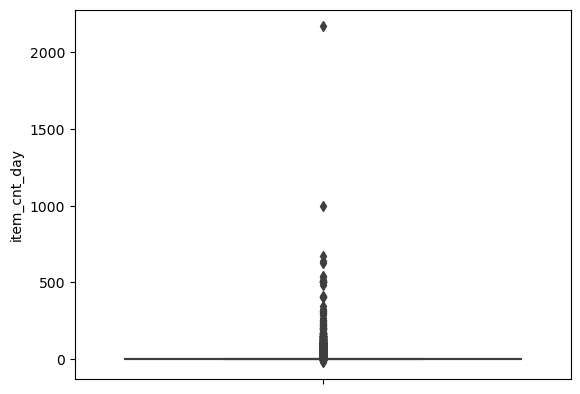

In [14]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

sns.boxplot(y='item_cnt_day', data= train)

<AxesSubplot:ylabel='item_price'>

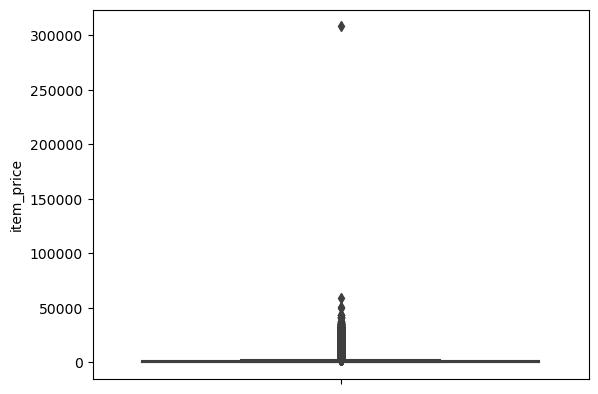

In [15]:
sns.boxplot(y='item_price', data =train)

In [17]:
group = train.groupby('date_block_num').agg({'item_cnt_day': 'sum'})
group.reset_index()

,date_block_num,item_cnt_day
0,0,131479.0
1,1,128090.0
2,2,147142.0
3,3,107190.0
4,4,106970.0
5,5,125381.0
6,6,116966.0
7,7,125291.0
8,8,133332.0
9,9,127541.0


[Text(0.5, 1.0, 'Distribution of monthly item counts by date block number'),
 Text(0.5, 0, 'Date block number'),
 Text(0, 0.5, 'Monthly item counts')]

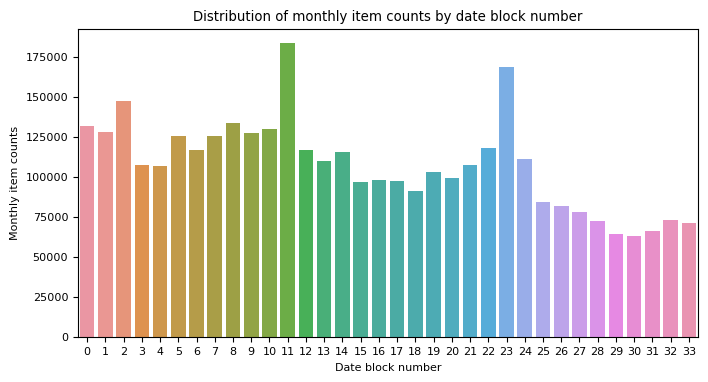

In [20]:
mpl.rc('font', size =8)
figure, ax = plt.subplots()
figure.set_size_inches(8,4)

group_month_sum = train.groupby('date_block_num').agg({'item_cnt_day':'sum'})
group_month_sum = group_month_sum.reset_index()
sns.barplot(x='date_block_num', y = 'item_cnt_day', data=group_month_sum)
ax.set(title='Distribution of monthly item counts by date block number',
       xlabel='Date block number',
       ylabel='Monthly item counts')

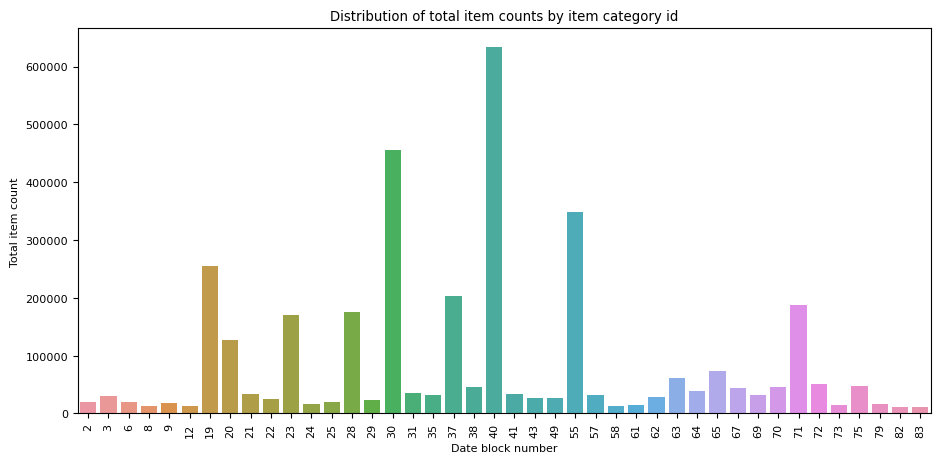

In [25]:
figure, ax = plt.subplots()
figure.set_size_inches(11,5)

group_cat_sum = train.groupby('item_category_id').agg({'item_cnt_day': 'sum'})
group_cat_sum = group_cat_sum.reset_index()
group_cat_sum = group_cat_sum[group_cat_sum['item_cnt_day'] > 10_000]

sns.barplot(x = 'item_category_id', y= 'item_cnt_day', data=group_cat_sum)
ax.set(title = 'Distribution of total item counts by item category id',
       xlabel='Date block number', ylabel = 'Total item count')
ax.tick_params(axis = 'x', labelrotation= 90)

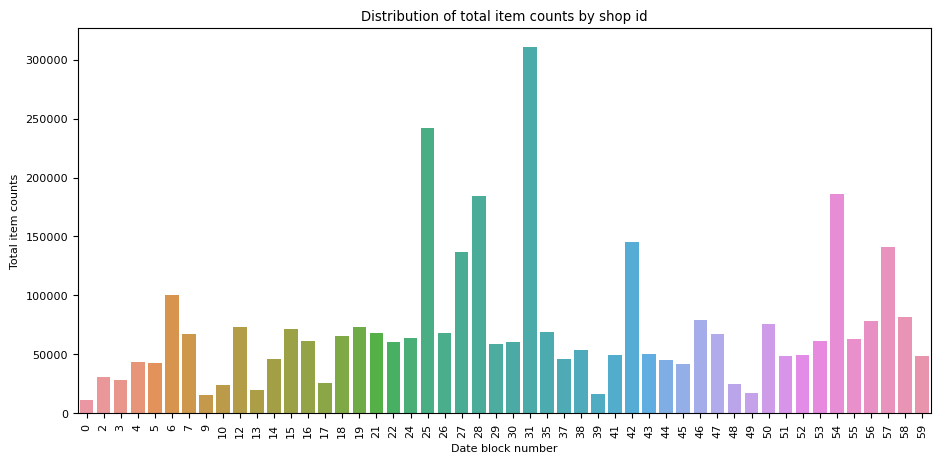

In [27]:
figure, ax = plt.subplots()
figure.set_size_inches(11,5)

group_shop_sum = train.groupby('shop_id').agg({'item_cnt_day': 'sum'})
group_shop_sum = group_shop_sum.reset_index()

group_shop_sum = group_shop_sum[group_shop_sum['item_cnt_day'] > 10_000]

sns.barplot(x = 'shop_id', y = 'item_cnt_day', data = group_shop_sum)
ax.set(title = 'Distribution of total item counts by shop id', xlabel = 'Date block number', ylabel='Total item counts')
ax.tick_params(axis = 'x', labelrotation = 90)